In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import string
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn import metrics

import nltk

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import tensorflow as tf
from tensorflow import keras



In [7]:
spacy_model = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

spacy_model

In [8]:
# Example of lemmatization and a word dataset

x = "It's been a hard road ahead but also very fun in the journey of becoming the pirate king"
y = lemmatizer.lemmatize(x)
print(lemmatizer.lemmatize(x, wordnet.VERB))

print('--------------------------')

y = spacy_model(x)
for token in y:
    print(token.lemma_)

It's been a hard road ahead but also very fun in the journey of becoming the pirate king
--------------------------
it
be
be
a
hard
road
ahead
but
also
very
fun
in
the
journey
of
become
the
pirate
king


In [9]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Symptom2Disease.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [10]:
data["text"].isnull().sum()

0

In [11]:
def lemmatization(text):
    tokens = spacy_model(text)
    text = " "
    for token in tokens:
        lemma = token.lemma_
        if (lemma in string.punctuation) or ("'" in lemma):
            continue
        else:
            text = text+lemma+" "

    return text.lower()

lemmatized_data = data['text'].apply(lambda x: lemmatization(x))
lemmatized_data

0        i have be experience a skin rash on my arm le...
1        my skin have be peel especially on my knee el...
2        i have be experience joint pain in my finger ...
3        there be a silver like dust on my skin especi...
4        my nail have small dent or pit in they and th...
                              ...                        
1195     i be shake and tremble all over i lose my sen...
1196     particularly in the crevice of my skin i have...
1197     i regularly experience these intense urge and...
1198     i have trouble breathing especially outside i...
1199     i constantly sneeze and have a dry cough my i...
Name: text, Length: 1200, dtype: object

In [12]:
# removing stopwords
stopwords = nltk.corpus.stopwords
stops = set(stopwords.words("english"))
print(stops)

def remove_stopwords(text):
    for i in stops:
        text = re.sub(" "+i+" ", " ", text)

    return text

removed_stopwords = lemmatized_data.apply(lambda x: remove_stopwords(x))

{'until', 'through', 'any', 'should', 'him', 'over', 'we', 'on', 'that', 'if', 'how', 'my', 'so', 'her', 'into', 'wasn', 'in', 'own', 'ma', 'each', "shouldn't", 'some', "hadn't", 'have', 'are', 'our', 'more', "wasn't", 'am', 'do', 'under', 'won', 'shouldn', "that'll", 'out', 'did', 'he', 'this', 'your', 'once', "wouldn't", 'and', 'll', 'by', 'she', 'mustn', 'd', 'be', 'other', 's', 'needn', "you'll", 'shan', "you'd", 'their', 'up', "mightn't", "it's", 'from', 're', 'themselves', 'yourself', 'a', 'or', "should've", 'why', 'haven', 'these', 'whom', 'itself', 'what', 'were', 'below', 'about', 'when', "shan't", 'both', 'm', "you've", 'didn', 'which', 'was', 've', 'y', 'here', 'such', 'with', 'being', 'while', 'because', 'them', 'just', "isn't", 'theirs', 'no', 'i', 'it', 'all', "mustn't", 'me', 't', "hasn't", 'doesn', "doesn't", 'but', "weren't", 'weren', 'too', "didn't", 'wouldn', 'the', 'couldn', 'its', 'himself', "aren't", 'will', 'who', 'aren', 'after', 'only', 'during', 'most', 'yours

In [13]:
for count, value in enumerate(removed_stopwords):
    print(count, value)
    if count > 15:
        break

0  experience skin rash arm leg torso past week red itchy cover dry scaly patch 
1  skin peel especially knee elbow scalp peeling often accompany burning sting sensation 
2  experience joint pain finger wrist knee pain often achy throbbing get bad move joint 
3  silver like dust skin especially low back scalp dusting make small scale flake easily scratch 
4  nail small dent pit they often feel inflammatory tender touch even minor rash arm 
5  skin palm sol thicken deep crack crack painful bleed easily 
6  skin around mouth nose eye red inflame often itchy uncomfortable noticeable inflammation nail 
7  skin sensitive react easily change temperature humidity often careful product use skin 
8  notice sudden peeling skin different part body mainly arm leg back also face severe joint pain skin rash 
9  skin genital red inflame often itchy burning uncomfortable rash different part body 
10  experience fatigue general feeling malaise often feel tired lack energy even good night sleep 
11  ras

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(removed_stopwords)

In [16]:
word_index = tokenizer.word_index
print(len(word_index))

1240


In [17]:
sequences = tokenizer.texts_to_sequences(removed_stopwords)
sequences[:15]

[[7, 3, 13, 52, 46, 631, 223, 286, 22, 61, 214, 73, 742, 160],
 [3, 275, 137, 314, 335, 420, 357, 66, 128, 632, 897, 205],
 [7, 41, 6, 488, 743, 314, 6, 66, 744, 633, 10, 47, 117, 41],
 [489, 34, 553, 3, 137, 177, 28, 420, 634, 42, 135, 554, 390, 447, 287],
 [235, 135, 288, 745, 898, 66, 1, 746, 635, 206, 178, 747, 13, 52],
 [3, 636, 637, 899, 900, 490, 490, 31, 161, 447],
 [3, 91, 106, 53, 71, 22, 173, 66, 61, 40, 289, 491, 235],
 [3, 224, 901, 447, 154, 54, 748, 66, 902, 903, 149, 3],
 [112, 358, 357, 3, 120, 242, 24, 749, 52, 46, 28, 2, 79, 23, 41, 6, 3, 13],
 [3, 750, 22, 173, 66, 61, 632, 40, 13, 120, 242, 24],
 [7, 123, 555, 207, 904, 66, 1, 94, 252, 236, 178, 492, 67, 155],
 [13, 3, 208, 242, 24, 215, 16, 276, 61, 40, 66, 47, 67, 2, 79, 3, 357],
 [13, 3, 47, 751, 905, 556, 73, 188, 638, 39, 149, 752, 237, 3, 493],
 [7, 63, 155, 253, 35, 27, 48, 13, 135, 288, 235, 5, 254],
 [3, 336, 179, 253, 73, 299, 160, 7, 167, 6, 41, 3, 314, 753, 75, 275]]

In [18]:
label_keys = list(data['label'].value_counts().keys())
labels = data['label'].apply(lambda x: (label_keys.index(x)))
labels

0        0
1        0
2        0
3        0
4        0
        ..
1195    23
1196    23
1197    23
1198    23
1199    23
Name: label, Length: 1200, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(removed_stopwords, labels, train_size=0.7)

In [20]:
tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded_sequences = pad_sequences(training_sequences, padding="post", maxlen=30)

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded_sequences = pad_sequences(test_sequences, padding="post", maxlen=30)

In [21]:
training_padded_sequences = np.array(training_padded_sequences)
test_padded_sequences = np.array(test_padded_sequences)
vocab_size = len(word_index)

In [22]:
print(training_padded_sequences.shape)
print(test_padded_sequences.shape)
print(vocab_size)

(840, 30)
(360, 30)
1103


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 16, input_length=len(training_padded_sequences[0])),
#     tf.keras.layers.LSTM(10),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(24, activation="softmax")
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            17664     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
Total params: 19272 (75.28 KB)
Trainable params: 19272 (75.28 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [24]:
num_epochs = 40
history = model.fit(
    training_padded_sequences,
    y_train,
    epochs=num_epochs,
    validation_data=(test_padded_sequences, y_test), verbose=2)

Epoch 1/40
27/27 - 1s - loss: 3.1770 - accuracy: 0.0476 - val_loss: 3.1751 - val_accuracy: 0.0861 - 1s/epoch - 55ms/step
Epoch 2/40
27/27 - 0s - loss: 3.1706 - accuracy: 0.0607 - val_loss: 3.1690 - val_accuracy: 0.0250 - 110ms/epoch - 4ms/step
Epoch 3/40
27/27 - 0s - loss: 3.1572 - accuracy: 0.0488 - val_loss: 3.1534 - val_accuracy: 0.0278 - 108ms/epoch - 4ms/step
Epoch 4/40
27/27 - 0s - loss: 3.1279 - accuracy: 0.0750 - val_loss: 3.1208 - val_accuracy: 0.0639 - 113ms/epoch - 4ms/step
Epoch 5/40
27/27 - 0s - loss: 3.0728 - accuracy: 0.1369 - val_loss: 3.0604 - val_accuracy: 0.1167 - 121ms/epoch - 4ms/step
Epoch 6/40
27/27 - 0s - loss: 2.9765 - accuracy: 0.1821 - val_loss: 2.9553 - val_accuracy: 0.1250 - 130ms/epoch - 5ms/step
Epoch 7/40
27/27 - 0s - loss: 2.8244 - accuracy: 0.1750 - val_loss: 2.8024 - val_accuracy: 0.1278 - 129ms/epoch - 5ms/step
Epoch 8/40
27/27 - 0s - loss: 2.6428 - accuracy: 0.1869 - val_loss: 2.6476 - val_accuracy: 0.1361 - 156ms/epoch - 6ms/step
Epoch 9/40
27/27 -

In [25]:
predict = model.predict(test_padded_sequences)


12/12 [==============================] - 0s 2ms/step


In [26]:
predict = np.argmax(predict, axis=1)
predict

array([ 9,  8, 23, 16, 23,  5, 11, 23,  3, 18, 21, 22, 20,  7,  7,  7, 20,
       22,  9,  9, 23,  5,  4, 12, 21,  5, 19, 19,  5,  6, 15, 22, 10,  0,
        6, 17,  0, 15,  5, 19, 13,  3,  9, 15, 14,  4, 16,  1,  3,  6,  6,
        9,  5, 14, 14, 18,  1, 19, 11,  9,  4,  8, 16, 16,  0, 17, 21,  4,
        7,  5, 13,  2,  0,  0,  6, 17, 19, 15,  5,  4, 18,  7,  9, 16, 14,
       16,  5,  7, 15,  7, 13, 18, 23, 22,  1,  8, 13, 22,  4,  7, 14,  3,
       20, 22, 10,  9, 23,  0, 20, 20, 15, 21, 14, 12,  5,  6, 21,  1,  4,
        9, 17, 21,  9,  9, 20,  6, 17,  6,  8,  9, 11, 19,  1,  1,  3, 15,
       21, 18, 13,  4,  8, 22, 21,  2, 19,  1, 20,  7, 21,  1, 10, 15, 23,
       21,  0,  5, 12, 11,  7, 14,  4, 20, 12, 18,  9,  5, 13,  6,  9, 21,
       16, 11,  1, 19, 13,  2, 23, 15, 18, 12, 21, 21,  1,  7,  5,  4, 17,
        5, 16,  7, 14, 21,  7, 19, 13,  6, 14,  4, 22,  2, 12, 14, 17, 14,
        0, 18, 11,  8,  1, 14, 21,  0, 16,  4, 14, 23, 17,  2, 19, 10,  9,
       18,  8,  1,  3,  5

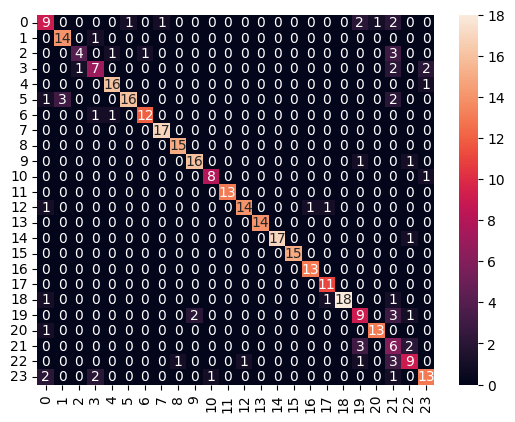

In [27]:
cm = metrics.confusion_matrix(y_test, predict)

sns.heatmap(cm, annot=True)
plt.show()

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('classic_model.tflite', 'wb') as f:
    f.write(tflite_model)

from google.colab import files

files.download('classic_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>